# Model validation

### Outline <a name = 'outline'></a>
* [Data generation](#data) 
* [Non CV Quality Assessment](#validation) 
* [CV Quality Assessment](#cv) 
* [Grid Search For Optimal Parameters](#grid)

In [215]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.pyplot.style.use('ggplot')

from sklearn import datasets, metrics, model_selection, tree

import numpy as np

In [216]:
%matplotlib inline

In [217]:
#helper function for 2d plot visualization

def plot_2d_dataset(data_tuple, size = (5,5), 
                    colors:list = ['red', 'black']):
    """Function to generate 2d plot for plain datasets"""
    
    #set size
    plt.figure(figsize = size)
    
    #build figure
    plt.scatter(data_tuple[0][:, 0], 
                data_tuple[0][:, 1], 
                c = data_tuple[1], 
                cmap = matplotlib.colors.ListedColormap(colors))
    
    #show figure
    plt.show()

In [218]:
#helper functions for decision surface visualization

colors = matplotlib.colors.ListedColormap(['red', 'black', 'blue'])
light_colors = matplotlib.colors.ListedColormap(['lightcoral', 'silver', 'lightblue'])

def get_meshgrid(data, step = .05, border = .5,):
    """Function to get meshgrid for 2d data"""
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    """Function to visualize decision surface on train and test datasets"""
    
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(
        estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    
    plt.pcolormesh(xx, 
                      yy, 
                      mesh_predictions, 
                      cmap = light_colors)
    
    plt.scatter(train_data[:, 0], 
                   train_data[:, 1], 
                   c = train_labels, 
                   s = 100, 
                   cmap = colors)
    
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(
        train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, 
                   yy, 
                   mesh_predictions, 
                   cmap = light_colors)
    
    plt.scatter(test_data[:, 0], 
                test_data[:, 1], 
                c = test_labels, 
                s = 100, 
                cmap = colors)
    
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(
        test_labels, estimator.predict(test_data))))
    
    #show figure
    plt.show()

## Data Generation <a name = 'data'></a>

In [219]:
#data generation
classification_problem = datasets.make_classification(n_samples = 400, n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant = 0, 
                                                      n_clusters_per_class = 1, 
                                                      random_state = 111)

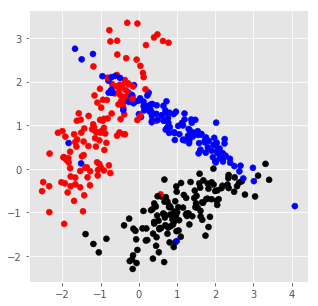

In [220]:
plot_2d_dataset(classification_problem, colors = ['red', 'black', 'blue'])

[back to outline](#outline)

## Non CV Quality Assessment  <a name = 'validation'></a>

**Hold-out dataset**

In [221]:
data, holdout_test_data, labels, holdout_test_labels = model_selection.train_test_split(
    classification_problem[0], classification_problem[1], test_size = 0.2, random_state = 1)

In [222]:
# This is the dataset for a final test. We are not going to use it for bvalidation!
holdout_test_data
holdout_test_labels

array([0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0,
       0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2,
       2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0])

**Validation dataset**

In [223]:
train_data, validation_data, train_labels, validation_labels = model_selection.train_test_split(
    data, labels, test_size = 0.25, random_state = 1)

**Decision tree**

In [224]:
#classifier instance
tree_clf_max_depth = tree.DecisionTreeClassifier(random_state = 1, max_depth = 4)

In [225]:
tree_clf_min_split = tree.DecisionTreeClassifier(random_state = 1, min_samples_split = 10)

In [226]:
tree_clf_max_depth

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [227]:
tree_clf_min_split

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [228]:
#classifier training
tree_clf_max_depth.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [229]:
#classifier training
tree_clf_min_split.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

**Validation score**

In [230]:
#predictions generation 
tree_clf_max_depth_preds = tree_clf_max_depth.predict(validation_data)

In [231]:
#predictions generation 
tree_clf_min_split_preds = tree_clf_min_split.predict(validation_data)

In [232]:
print(metrics.accuracy_score(validation_labels, tree_clf_max_depth_preds))
print(metrics.accuracy_score(validation_labels, tree_clf_min_split_preds))

0.85
0.875


**Hold-out test score**

In [233]:
#predictions generation 
ho_tree_clf_max_depth_preds = tree_clf_max_depth.predict(holdout_test_data)

In [234]:
#predictions generation 
ho_tree_clf_min_split_preds = tree_clf_min_split.predict(holdout_test_data)

In [235]:
print(metrics.accuracy_score(holdout_test_labels, ho_tree_clf_max_depth_preds))
print(metrics.accuracy_score(holdout_test_labels, ho_tree_clf_min_split_preds))

0.9375
0.9125


[back to outline](#outline)

## Cross Validation Quality Assessment <a name = 'cv'></a>

### CV stratagies

**K-Fold**

In [236]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

y = np.array([0,0,0,0,0,1,1,1,1,1])

In [237]:
kf = model_selection.KFold(n_splits = 5, random_state = None, shuffle = True)

for train_index, test_index in kf.split(x):
    print("train:", x[train_index], "test:", x[test_index])
    #print(f'train target: {y[train_index]}, test target:{y[test_index]}')

train: [ 1  2  3  4  5  6  9 10] test: [7 8]
train: [1 2 3 5 6 7 8 9] test: [ 4 10]
train: [ 1  2  3  4  6  7  8 10] test: [5 9]
train: [ 2  3  4  5  7  8  9 10] test: [1 6]
train: [ 1  4  5  6  7  8  9 10] test: [2 3]


**Startified K-Fold**

In [238]:
skf = model_selection.StratifiedKFold(n_splits = 3, random_state = 10, shuffle = False)

for train_index, test_index in skf.split(x, y):
    #print("train:", x[train_index], "test:", x[test_index])
    print(f'train target: {y[train_index]}, test target:{y[test_index]}')

train target: [0 0 0 1 1 1], test target:[0 0 1 1]
train target: [0 0 0 1 1 1], test target:[0 0 1 1]
train target: [0 0 0 0 1 1 1 1], test target:[0 1]


**Leave One Out**

In [239]:
kf = model_selection.LeaveOneOut()

for train_index, test_index in kf.split(x):
    print("train:", x[train_index], "test:", x[test_index])

train: [ 2  3  4  5  6  7  8  9 10] test: [1]
train: [ 1  3  4  5  6  7  8  9 10] test: [2]
train: [ 1  2  4  5  6  7  8  9 10] test: [3]
train: [ 1  2  3  5  6  7  8  9 10] test: [4]
train: [ 1  2  3  4  6  7  8  9 10] test: [5]
train: [ 1  2  3  4  5  7  8  9 10] test: [6]
train: [ 1  2  3  4  5  6  8  9 10] test: [7]
train: [ 1  2  3  4  5  6  7  9 10] test: [8]
train: [ 1  2  3  4  5  6  7  8 10] test: [9]
train: [1 2 3 4 5 6 7 8 9] test: [10]


### CV model validation

In [240]:
tree_max_depth_scoring = model_selection.cross_val_score(tree_clf_max_depth, 
                                                train_data, 
                                                train_labels, 
                                                scoring = 'accuracy', 
                                                cv = 10)

In [241]:
tree_min_split_scoring = model_selection.cross_val_score(tree_clf_min_split, 
                                             train_data, 
                                             train_labels, 
                                             scoring = 'accuracy', 
                                             cv = 10)

In [242]:
#example of the custom scorer
tree_min_split_scoring_v2 = model_selection.cross_val_score(tree_clf_min_split, 
                                             train_data, 
                                             train_labels, 
                                             scoring = metrics.make_scorer(metrics.accuracy_score,
                                                                      greater_is_better = True), 
                                             cv = 10)

In [243]:
tree_max_depth_scoring

array([0.80769231, 0.80769231, 0.88461538, 0.875     , 0.91304348,
       0.95652174, 0.7826087 , 0.86956522, 0.91304348, 0.91304348])

In [244]:
tree_min_split_scoring

array([0.88461538, 0.80769231, 0.80769231, 0.875     , 0.91304348,
       0.95652174, 0.7826087 , 0.86956522, 0.86956522, 0.91304348])

In [245]:
print('Cross validation accuracy score')
print(f'Tree max depth:{tree_max_depth_scoring.mean():.3f} +/- {tree_max_depth_scoring.std():.3f}')
print(f'Tree min split:{tree_min_split_scoring.mean():.3f} +/- {tree_min_split_scoring.std():.3f}')

Cross validation accuracy score
Tree max depth:0.872 +/- 0.054
Tree min split:0.868 +/- 0.052


In [246]:
print('Hold-out test accuracy score')
print(f'Tree max depth: {metrics.accuracy_score(holdout_test_labels, ho_tree_clf_max_depth_preds):.3f}')
print(f'Tree min split: {metrics.accuracy_score(holdout_test_labels, ho_tree_clf_min_split_preds):.3f}')

Hold-out test accuracy score
Tree max depth: 0.938
Tree min split: 0.912


[back to outline](#outline)

## Hyperparameters optimization <a name = 'grid'></a>

### Grid Search For Optimal Parameters 

In [247]:
clf = tree.DecisionTreeClassifier()

In [248]:
#parameters check 
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [249]:
#grid generation
parameters_grid = {
    'max_depth' : [4, 6, 8, 10, 12],
    'min_samples_leaf' : [2, 5, 10],
    'min_samples_split' : [8, 10, 16, 20]
}

In [250]:
grid_cv = model_selection.GridSearchCV(clf, parameters_grid) 

In [251]:
grid_cv

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [2, 5, 10], 'min_samples_split': [8, 10, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [252]:
%%time
grid_cv.fit(train_data, train_labels)

CPU times: user 260 ms, sys: 4.26 ms, total: 264 ms
Wall time: 278 ms


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [2, 5, 10], 'min_samples_split': [8, 10, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [253]:
grid_cv.best_score_

0.8833333333333333

In [254]:
grid_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 20}

In [255]:
#What else can we get from grid search results?
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [256]:
grid_cv.cv_results_['mean_test_score']

array([0.87916667, 0.87916667, 0.87916667, 0.88333333, 0.86666667,
       0.86666667, 0.86666667, 0.87083333, 0.85416667, 0.85416667,
       0.85416667, 0.85416667, 0.84166667, 0.85833333, 0.85833333,
       0.88333333, 0.84583333, 0.84583333, 0.84583333, 0.86666667,
       0.85416667, 0.85416667, 0.85416667, 0.85416667, 0.87083333,
       0.86666667, 0.85833333, 0.88333333, 0.85      , 0.85      ,
       0.84583333, 0.86666667, 0.85416667, 0.85416667, 0.85416667,
       0.85416667, 0.86666667, 0.86666667, 0.85833333, 0.88333333,
       0.85      , 0.85      , 0.85      , 0.86666667, 0.85416667,
       0.85416667, 0.85416667, 0.85416667, 0.87083333, 0.85833333,
       0.85833333, 0.88333333, 0.85      , 0.85      , 0.85      ,
       0.86666667, 0.85416667, 0.85416667, 0.85416667, 0.85416667])

In [257]:
#best model
best_clf = grid_cv.best_estimator_

In [258]:
metrics.accuracy_score(holdout_test_labels, best_clf.predict(holdout_test_data))

0.925

**Final model**

In [259]:
final_tree = grid_cv.best_estimator_

In [260]:
final_tree.fit(data, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [261]:
metrics.accuracy_score(holdout_test_labels, final_tree.predict(holdout_test_data))

0.9

[back to outline](#outline)

If you got interested in parameters optimization, fill free to check out following libraries:
- [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [Nelder-Mead optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#nelder-mead-simplex-algorithm-method-nelder-mead)
- [HyperOpt](http://hyperopt.github.io/hyperopt/)